<a href="https://colab.research.google.com/github/balezz/cv_course_fa_mag/blob/main/CodeLab_1_CV_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision
### CodeLab 1

Изображения в python-opencv: загрузка, преобразование цвета и основные 
статистики.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -O lena.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2022-11-11 18:42:29--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2022-11-11 18:42:29 (7.92 MB/s) - ‘lena.png’ saved [473831/473831]



In [3]:
img_bgr = cv2.imread('lena.png')
img_bgr.shape, type(img_bgr)

((512, 512, 3), numpy.ndarray)

In [4]:
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

(512, 512)


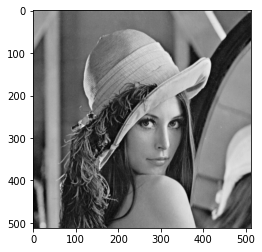

In [5]:
plt.imshow(gray_image, cmap='gray')

In [6]:
# Основные статистики изображения
gray_image.min(), gray_image.max(), gray_image.mean()

(25, 245, 124.0485610961914)

(array([15330., 31337., 20358., 35131., 41844., 50760., 33320., 17552.,
        15860.,   652.]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 10 Patch objects>)

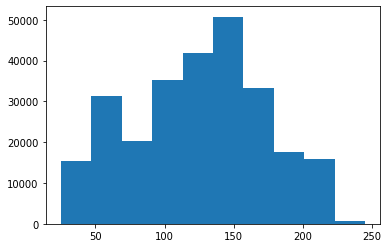

In [7]:
plt.hist(gray_image.ravel())

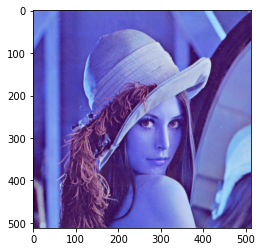

In [8]:
# https://stackoverflow.com/questions/14556545/why-opencv-using-bgr-colour-space-instead-of-rgb
plt.imshow(img_bgr)

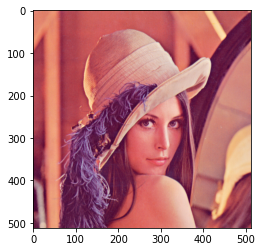

In [9]:
img = img_bgr[:, :, ::-1]
plt.imshow(img)

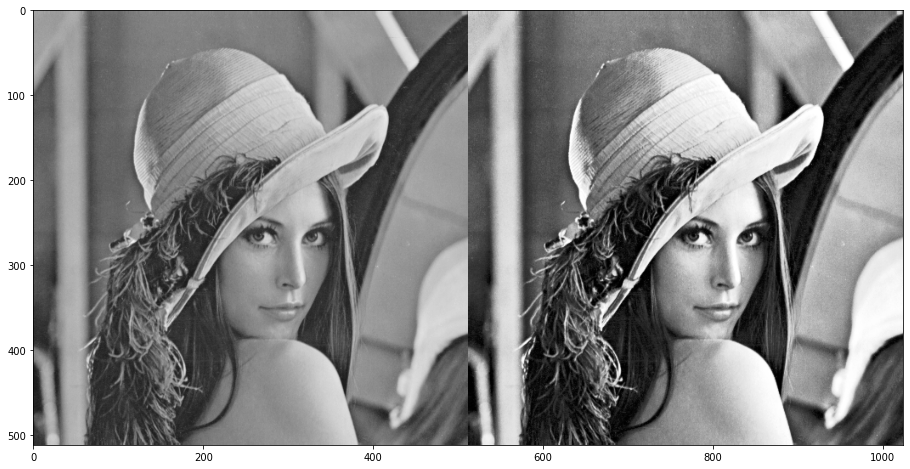

In [11]:
# Эквивализация гистограммы
equ_img = cv2.equalizeHist(gray_image)
result = np.hstack((gray_image, equ_img)) #stacking images side-by-side
plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='gray')

In [12]:
print(f'Original image mean: {gray_image.mean()}, std: {gray_image.std()}')
print(f'Equalized image mean: {equ_img.mean()}, std: {equ_img.std()}')

Original image mean: 124.0485610961914, std: 47.855599631086996
Equalized image mean: 128.27414321899414, std: 73.5896334380197


**Задание 1:** Нормализуйте изображения по формуле.
$$img_{n} = \frac{img - mean(img)}{std(img)} $$
Затем масштабируйте нормализованное изображение в интервал [0, 255]  

Отобразите результат вместе с оригинальным изображением и с эквивализированной гистограммой.  

In [13]:
# Code here


### Нормализация цветных изображений

(array([8.0000e+00, 1.0090e+03, 4.9764e+04, 6.3636e+04, 5.8579e+04,
        4.6524e+04, 1.7888e+04, 1.6847e+04, 7.4330e+03, 4.5600e+02]),
 array([  8. ,  29.7,  51.4,  73.1,  94.8, 116.5, 138.2, 159.9, 181.6,
        203.3, 225. ]),
 <a list of 10 Patch objects>)

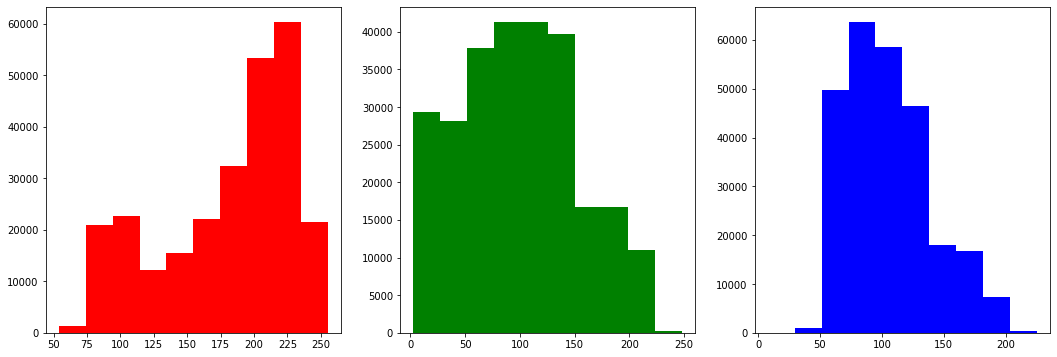

In [14]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.hist(img[:,:,0].ravel(), color='r')
plt.subplot(1,3,2)
plt.hist(img[:,:,1].ravel(), color='g')
plt.subplot(1,3,3)
plt.hist(img[:,:,2].ravel(), color='b')

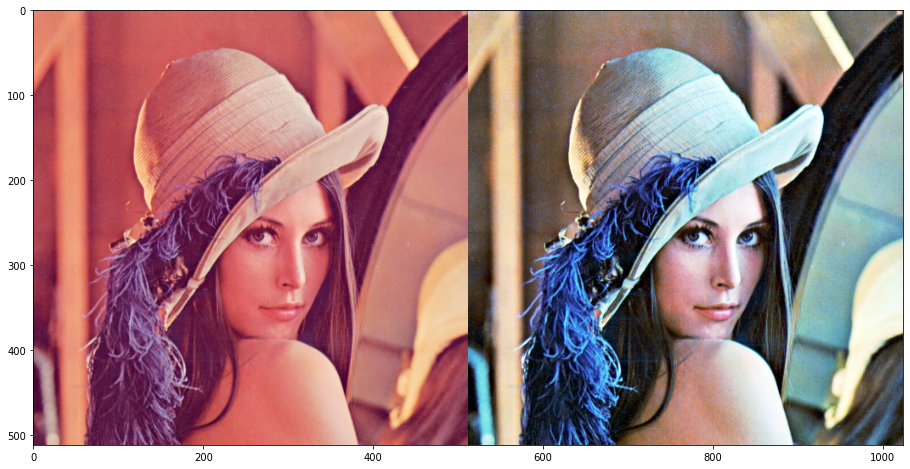

In [15]:
equ_r_img = cv2.equalizeHist(img[:,:,0])
equ_g_img = cv2.equalizeHist(img[:,:,1])
equ_b_img = cv2.equalizeHist(img[:,:,2])

equ_color_img = np.stack((equ_r_img, equ_g_img, equ_b_img), axis=-1)

result = np.hstack((img, equ_color_img)) #stacking images side-by-side
plt.figure(figsize=(16, 8))
plt.imshow(result)

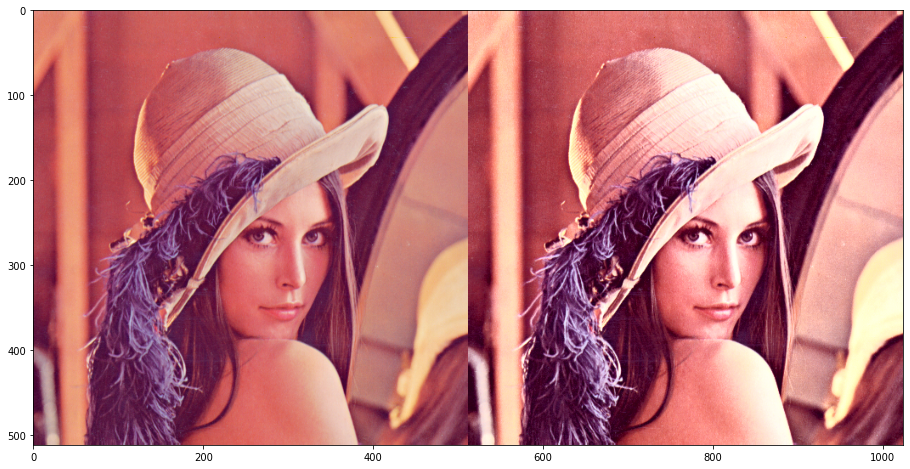

In [16]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

result = np.hstack((img, img_output)) #stacking images side-by-side
plt.figure(figsize=(16, 8))
plt.imshow(result)

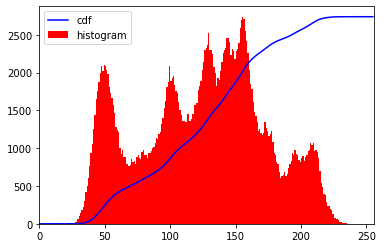

In [17]:
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

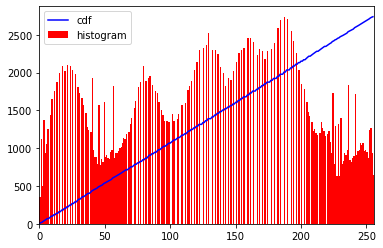

In [18]:
hist,bins = np.histogram(equ_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Семинар № 2. Классические методы машинного зрения

## Свертка с ядром

In [ ]:
median_img = np.zeros_like(gray_image)
M, N = gray_image.shape
KERNEL_SIZE = 5

In [ ]:
%%time
# too long with python for-cycles
for x in range(M-KERNEL_SIZE):
  for y in range(N-KERNEL_SIZE):
    median_img[x, y] = np.mean(gray_image[x:x+KERNEL_SIZE, y:y+KERNEL_SIZE])

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(median_img, cmap='gray')

In [ ]:
# Свертка с ядром, имеющим константные значения равноценна операции blur (размытие, усреднение)
KERNEL_SIZE = 5
kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE))
kernel = kernel/kernel.size
kernel

In [ ]:
gray_image[:KERNEL_SIZE, :KERNEL_SIZE]

In [ ]:
# Поэлементной умножение окна изображения с коэффициентами маски и их суммирование
np.sum(gray_image[:KERNEL_SIZE, :KERNEL_SIZE] * kernel)

In [ ]:
%%time
# much faster with opencv
img_median = cv2.filter2D(gray_image, -1, kernel)

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_median, cmap='gray')

**Задание 2:** Отобразите результат свертки с масками (kernels) из лекции: горизонтальная, вертикальная и наклонная 45 градусов. Размер kernel должен быть 5х5.

In [ ]:
# Code here

## Морфологические преобразования

In [ ]:
!wget -O j.png https://docs.opencv.org/4.5.3/Morphology_1_Tutorial_Theory_Original_Image.png

In [ ]:
j_img = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
element = np.array([[0, 1, 1, 0],
                    [1, 1, 1, 1],
                    [1, 1, 1, 1],
                    [0, 1, 1, 0]], dtype=np.uint8)

In [ ]:
erosion_img = cv2.erode(j_img, element)
dilate_img = cv2.dilate(j_img, element)

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(j_img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(erosion_img, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(dilate_img, cmap='gray')

**Задание 3:** отобразите результаты операций cv2.opening and cv2.closing Изображения нужно подобрать самостоятельно, чтобы был виден результат преобразований.

In [ ]:
# Code here


## Геометрические (аффинные) преобразования изображения.


In [ ]:
import string

# points a, b, c, d
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

In [ ]:
color_lut = 'rgbc' # ['r', 'g', 'b', 'c']
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

In [ ]:
# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], 
                [0, 2, 0], 
                [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

# draw lines b/w points
xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))

plt.grid()
plt.show()

 **Задание 4**: реализуйте два любых на выбор аффинных преобразования из лекции. 

In [ ]:
# Code here

Бонус: Оператор Собеля!

In [ ]:
grad_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0)  
grad_y = cv2.Sobel(gray_image,cv2.CV_16S, 0, 1)  

absX = cv2.convertScaleAbs(grad_x)   # Перенести обратно на uint8  0-255
absY = cv2.convertScaleAbs(grad_y)  

sobel_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)  

plt.figure(figsize=(16, 8))
plt.imshow(np.hstack([absX, absY, sobel_img]), cmap='gray')